<a href="https://colab.research.google.com/github/mahynski/chemometric-carpentry/blob/main/notebooks/6_Comparison_and_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
❓ ***Objective***: This notebook will introduce you to several ways to compare different modeling pipelines and how to inspect / understand them a bit more.  

🔁 ***Remember***: You can always revisit this notebook for reference again in the future.  Ideas and best practices will be reinforced in future notebooks, so don't worry about remembering everything the first time you see something new.

🧑 Author: Nathan A. Mahynski

📆 Date: June 17, 2024

---

We have now discussed the tools to build a modeling pipeline 🔩 including preprocessing and model selection 🤏.  We have also discussed how to use tools like GridSearchCV to optimize the hyperparameters in a pipeline.  This yields a performance estimate, and if we use [nested CV we can even get an uncertainty on this](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/cv_optimization.html#Nested-CV)!

For example:

```python
pipeline_1 = [0.90, 0.97, 0.95] # 0.94 +/- 0.03
pipeline_2 = [0.85, 0.95, 0.90] # 0.90 +*- 0.04
```

🤔 But how do we know which pipelines are better than others in a statistically significant way?

# Comparing Relative Performance of Pipelines

It is tempting to perform a simple [hypothesis test](https://en.wikipedia.org/wiki/Statistical_hypothesis_test) using the mean and standard deviation of the test scores from nested CV to infer the statistical significance of any observed differences. In particular, if we always the split the data the same way (importance of specifying a random number generator seed) then we can used a [paired t-test](https://en.wikipedia.org/wiki/Paired_difference_test) to determine if there is a difference.

For example:

```python
difference = pipeline_1 - pipeline_2 = [0.05, 0.02, 0.05] # 0.04 +/- 0.01
```

⚠ However, a major assumption of these sorts of tests is the independence of the trials / measurements.  Unfortunately, because data is re-used between different folds this is not true.

⭐ How to deal with this is discussed in detail in [PyChemAuth's documentation notebook]() on the subject.  (Note - some cells therein can take a while to execute)

# Model-agnostic Inspection Methods

<img src="https://christophm.github.io/interpretable-ml-book/images/big-picture.png" height=500 align="right" />

💻 AI/ML tools have demonstrated previously unparalleled capabilities in predictive computational modeling. However, to deploy these models in real-world 🌎 scenarios it is necessary to be able to explain why a model makes a prediction not just its degree of certainty, for example. This allows governments, corporations, and other users to reach a decision 🤔 about whether a model is trustworthy or not, or may exhibit a bias.

> The image at the right is from Chapter 6 of Christoph Molnar's book "Interpretable Machine Learning: A Guide for Making Black Box Models Explainable" available [here](https://christophm.github.io/interpretable-ml-book/).  It is an excellent reference.

Almost all of the best models (most accurate) are ensembles, where many individuals models are averaged; even if each individual model is interpretable/understandable to a human, their average quickly becomes opaque. Thus, interpretability methods are generally required.

👉 It is particularly important in scientific research as this can allow a researcher to inspect the "logic" behind a model's prediction to understand if the model has made a rational new discovery.

This is an enormous area of research.  [NIST](https://www.nist.gov/) is engaged in a great deal of research on safe and reliable AI:
* [AI @NIST](https://www.nist.gov/artificial-intelligence)
* [AI Standards](https://www.nist.gov/artificial-intelligence/ai-standards)
* [AI Safety Institute](https://www.nist.gov/aisi)

[NIST Interagency/Internal Report (NISTIR) - 8312](https://doi.org/10.6028/NIST.IR.8312-draft) outlines 4 principles of explainable AI:

* Explanations need to be delivered by models (they cannot be complete "black boxes")
* Those explanations need to be "meaningful" (subjective and tricky to achieve)
* The explanations themselves need to be accurate (this is not the same as model accuracy!)
* Knowledge limits (realated to out-of-distribution detection)


Cynthia Rudin has a very nice introduction to "Explainable AI" in the YouTube video below.



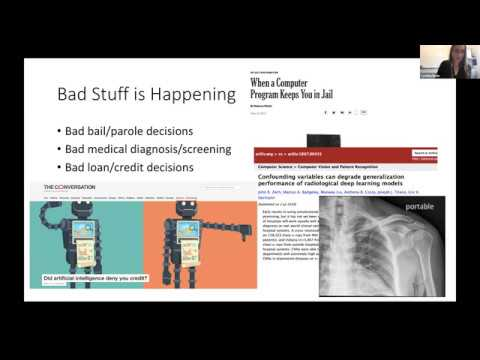

In [19]:
from IPython.display import YouTubeVideo

YouTubeVideo('I0yrJz8uc5Q', width="800", height="550")

Jay Alammar has a nice repository of [Explainable AI tools](https://ex.pegg.io/) and a cheat-sheet (below) that nicely summarizes things.

![image](https://ex.pegg.io/Explainable-AI-cheat-sheet-v0.2.1080.png)

Note that we have basically 2 avenues if we want to have an explainable system.  For this we need to define some more precise vocabulary 🗣:

1. Interpretable models - here, the model is interpretable by design.  For example, a decision tree doesn't really need a separate explanation because you can just "look" 👀 at it and understand it pretty well.

2. Explainable models - these require post-hoc explanation tools, which will be discussed below.

Model specific explanations:

---

Recall PCA.  When using this model, people often look at the loadings (coefficients on eigenvectors, possibly scaled by the square root of the eigenvalues) to understand how each feature plays a role in describing the data's "spread".

Similarly, LDA has "scalings".  In OLS, and other linear models like logistic regression, we can look at the coefficients that are built into the mathematics underlying the model itself.  

If you are committed to using a certain model, this is perfectly acceptable.  

❓ Q: But what if I need to choose between several different models?  How do we factor in, not only performance, but also how the models are "thinking" especially when different models might have different "explanation" methodologies.

🙋 A: Use a model-agnostic approach instead!

Model agnostic approaches

---

This refers to a set of methods that essentially try to treat the entire pipeline 🔩 like a black box ⬛ that it cannot inspect directly, but instead try to infer properties based on the relationships between the input and output of the pipeline.

🗣 A "black box model" is a model that does not reveal its inner workings, i.e., it cannot be understood just by looking at its parameters (like a neural net). The opposite is sometimes called a white box ⬜ which is interpretable. Model agnostic explaination methods treat all models as black boxes so as to be indendent of their details, regardless of what color box they are in reality.

Model agnostic methods are particularly helpful when using multiple models to perform the same task and they need to be compared.

From ["Model-Agnostic Interpretability of Machine Learning" by Ribeiro et al. (2016)](https://arxiv.org/abs/1606.05386):
> "Desirable aspects of a model-agnostic explanation system are:
>
> * Model flexibility: The interpretation method can work with any machine learning model, such as random forests and deep neural networks.
> * Explanation flexibility: You are not limited to a certain form of explanation. In some cases it might be useful to have a linear formula, in other cases a graphic with feature importances.
> * Representation flexibility: The explanation system should be able to use a different feature representation as the model being explained. For a text classifier that uses abstract word embedding vectors, it might be preferable to use the presence of individual words for the explanation."


Model agnostic approaches can be divided into 2 categories:

1. 🌎 They explain global, overall behavior, or
2. 🚶 They explain individual predictions

🔬 Here we will focus on tools that are applicable to tabular data (vs. "raw data" like text or images) since this is more common in chemometric applications.  

👉 Implicit in the "world" to "data" ("capture") step from Molnar's book is the expectation that the output is "featurized" into a table.  This is not always true, but is commonly the case in scientific applications since the application of scientific principles leads to hypotheses about what exactly to collect.  This is not always correct and raw data can sometimes hide information which is one reason deep learning can sometimes be a powerful tool for science and engineering!

## Permutation Feature Importance (PFI)


PFI is a 🌎 global model inspection method.

## SHapley Additive exPlanations (SHAP)

SHAP can provide both local 🚶 and global 🌎 explanations.

# Do I Need More Data?